<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "../../data/processed-data/Updated_Data_with_Sentiments.csv"
df = pd.read_csv(file_path)

In [24]:
# include interaction metrics (like count/view count %, comment count/ view count%) as factors
df['like_ratio'] = df['Like Count'] / df['View Count'] *100
df['comment_ratio'] = df['Comment Count'] / df['View Count'] *100

**Univariate Analysis**:

- **Numerical Variables**:
    - Provide summary statistics (mean, median, standard deviation).
    - Visualize distributions using histograms or density plots.

In [25]:
numeric_cols = ['singer_popularity', 'Days Since Published', 'Subscriber Count', 
                  'View Count', 'Like Count', 'Comment Count', 'like_ratio', 
                  'comment_ratio', 'Duration_seconds', 'Mean Sentiment Score']
                
print("\nNumerical Variables Summary Statistics:")
print(df[numeric_cols].describe())


Numerical Variables Summary Statistics:
       singer_popularity  Days Since Published  Subscriber Count  \
count         375.000000            375.000000      3.750000e+02   
mean           80.120000           3212.032000      8.392395e+06   
std            11.509773           2002.848485      1.220033e+07   
min            39.000000              0.000000      9.000000e+00   
25%            77.000000           1473.500000      7.550000e+05   
50%            81.000000           3391.000000      3.760000e+06   
75%            87.000000           5374.500000      1.060000e+07   
max           100.000000           6794.000000      6.040000e+07   

         View Count    Like Count  Comment Count  like_ratio  comment_ratio  \
count  3.750000e+02  3.750000e+02   3.750000e+02  375.000000     375.000000   
mean   3.702933e+08  2.498181e+06   9.775152e+04    1.187740       0.053684   
std    7.043627e+08  4.194654e+06   1.783573e+05    1.201180       0.083883   
min    2.760000e+02  0.000000e

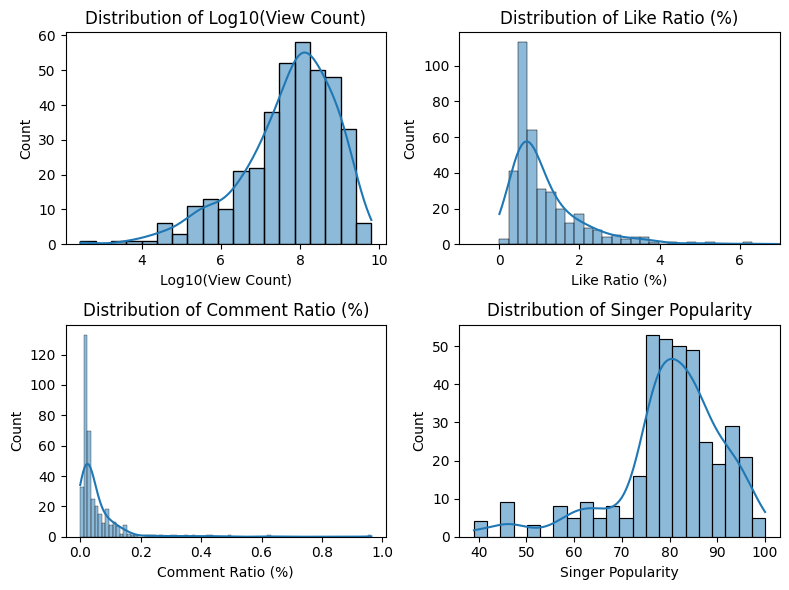

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# subplot1: Distribution of Log10(View Count)
sns.histplot(np.log10(df['View Count']), kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Log10(View Count)')
axes[0, 0].set_xlabel('Log10(View Count)')

# subplot2: Like Ratio distribution
sns.histplot(df['like_ratio'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Like Ratio (%)')
axes[0, 1].set_xlabel('Like Ratio (%)')
axes[0, 1].set_xlim(-1, 7)

# subplot3: Comment Ratio distribution
sns.histplot(df['comment_ratio'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Comment Ratio (%)')
axes[1, 0].set_xlabel('Comment Ratio (%)')

# subplot4: Distribution of Singer Popularity
sns.histplot(df['singer_popularity'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Singer Popularity')
axes[1, 1].set_xlabel('Singer Popularity')

plt.tight_layout()
plt.show()

For plot Distribution of Log10(View Count), it shows normal distribution characteristics. We can conclude that most of the videos have view counts between 10^7-10^9.

For plot Like Ratio Distribution, it shows right skewed distribution. The Like Ratio of most videos is concentrated between 0-2%.

For plot Comment Ratio Distribution, it shows a strong right-skewed distribution. Most videos have a comment ratio of less than 0.2%

For plot Singer Popularity Distribution, it ranges from 40-100 scores. There is a clear peak at around 80.


- **Categorical Variables**:
    - Present frequency counts and visualize distributions using bar charts or pie charts.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'rock'),
  Text(1, 0, 'pop'),
  Text(2, 0, 'jazz'),
  Text(3, 0, 'hip-pop'),
  Text(4, 0, 'electronic')])

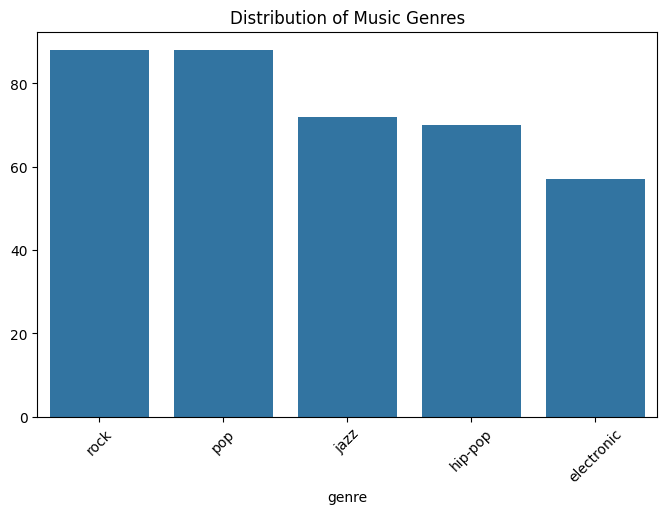

In [41]:
# Genre distribution
plt.figure(figsize=(8, 5))
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Music Genres')
plt.xticks(rotation=45)

**Bivariate and Multivariate Analysis**:

- **Correlation Analysis**:
  - Analyze relationships between numerical variables using a correlation matrix.
  - Visualize with heatmaps or pair plots and discuss any strong correlations.

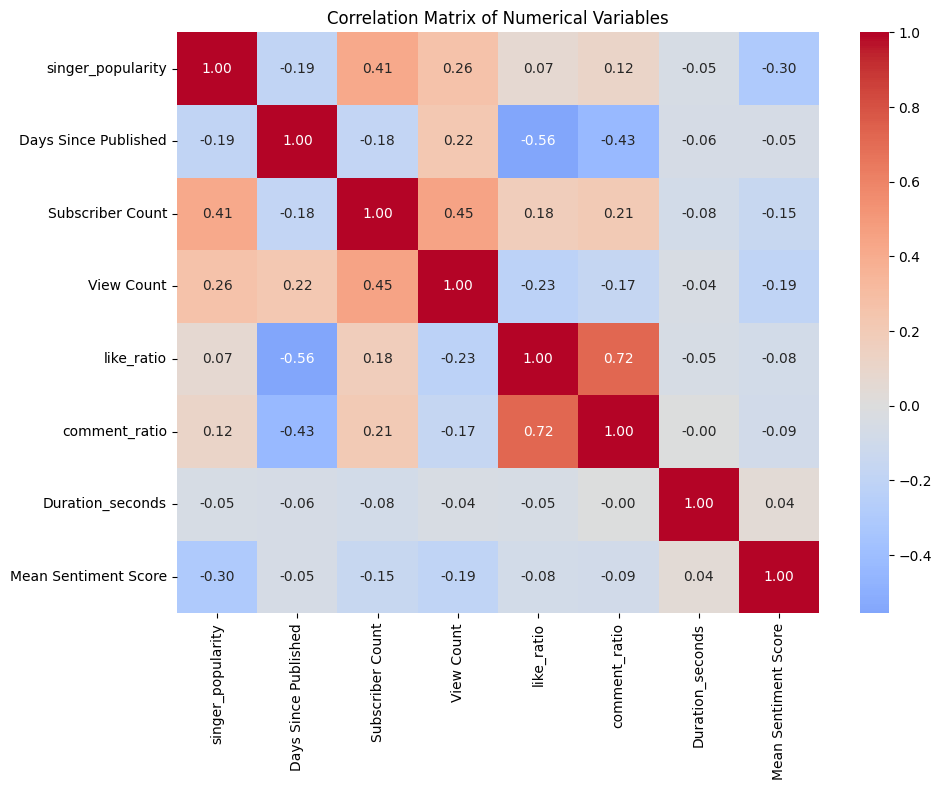

In [ ]:
numeric_cols = ['singer_popularity', 'Days Since Published', 'Subscriber Count', 
                  'View Count', 'like_ratio','comment_ratio', 'Duration_seconds', 'Mean Sentiment Score']
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,  
            fmt='.2f') 
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()

From this plot, we observe three key positive correlations: 
A strong relationship between the rate of likes and comments (0.72) suggests that sticky subscriber behaviors such as likes and comments are closely related;
A moderate correlation between the number of subscribers and the number of views (0.45) indicates that channels with a higher number of subscribers tend to get more views
Another moderate correlation (0.41) shows that more popular artists tend to attract more channel subscribers.

For negative correlations:
A strong negative correlation (-0.56) between days of posting and the likes ratio demonstrates that  videos posted for a longer period of time tend to have a lower likes ratio;
A weak negative correlation (-0.30) between Singer_popularity and the average sentiment score interestingly suggests that more popular singers may receive lower sentiment scores in comments, which might be due to an increase in negative feedback as their popularity grows.

In addition, Singer_popularity showed significant correlations with several features, making these features valuable predictors for assessing singer popularity.

- **Feature Pairings**:
  - Analyze relationships between key variables, particularly those related to your target.
  - Visualize with scatter plots, box plots, or violin plots.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/qx/qwpm5zm52fzd9w3sfybpybzh0000gn/T/ipykernel_35679/4266964686.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


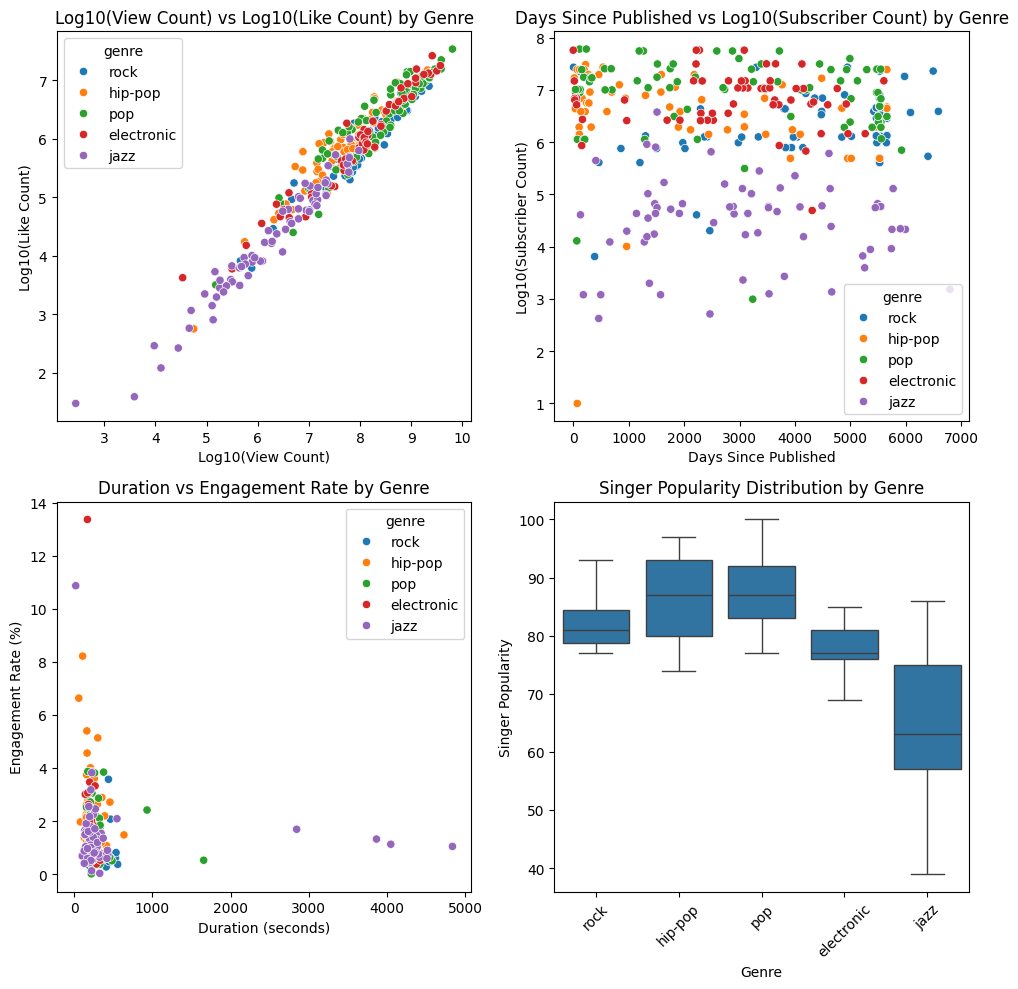

In [48]:
# Feature Pairing Analysis
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 1. Log10(View Count) vs Log10(Like Count) by Genre
sns.scatterplot(data=df, 
                x=np.log10(df['View Count']), 
                y=np.log10(df['Like Count']),
                hue='genre',
                ax=axes[0, 0])
axes[0, 0].set_title('Log10(View Count) vs Log10(Like Count) by Genre')
axes[0, 0].set_xlabel('Log10(View Count)')
axes[0, 0].set_ylabel('Log10(Like Count)')

# 2. Days Since Published vs Subscriber Count
sns.scatterplot(data=df,
                x='Days Since Published',
                y=np.log10(df['Subscriber Count'] + 1),  # Log transform for scaling
                hue='genre',
                ax=axes[0, 1])
axes[0, 1].set_title('Days Since Published vs Log10(Subscriber Count) by Genre')
axes[0, 1].set_xlabel('Days Since Published')
axes[0, 1].set_ylabel('Log10(Subscriber Count)')

# 3. Duration vs Engagement Rate by Genre
df['Engagement_Rate'] = (df['Like Count'] + df['Comment Count']) / df['View Count'] * 100
sns.scatterplot(data=df,
                x='Duration_seconds',
                y='Engagement_Rate',
                hue='genre',
                ax=axes[1, 0])
axes[1, 0].set_title('Duration vs Engagement Rate by Genre')
axes[1, 0].set_xlabel('Duration (seconds)')
axes[1, 0].set_ylabel('Engagement Rate (%)')

# 4. Singer Popularity Distribution by Genre
sns.boxplot(data=df,
            x='genre',
            y='singer_popularity',
            ax=axes[1, 1])
axes[1, 1].set_title('Singer Popularity Distribution by Genre')
axes[1, 1].set_xlabel('Genre')
axes[1, 1].set_ylabel('Singer Popularity')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


From plot Log10(View Count) vs Log10(Like Count), we can observe a strong positive correlation across all genres; Jazz music has generally low view count and like count, Pop, Hip-hop and Electronic music dominate in the high view count area, and the number of likes and view counts basically increase in a positive proportion, suggesting a consistent user behavior. The number of likes and views are basically increasing proportionally, indicating the consistency of user behavior.

From plot days to release vs. number of subscribers (Log10), we observe that, similar to the chart of Log10 (number of views) vs. number of subscribers (number of likes), jazz have significantly fewer subscribers than other genres. In contrast, pop, hip-hop, rock, and electronic music typically have higher subscriber counts. The relationship between the time span of publication and the number of subscribers is not very clear and the distribution is spread out. Notably, from the dispersed distribution, the relatively low number of subscribers in the pop, hip-hop and electronic music genres compared to the other genres suggests that publication time has little effect on the number of subscribers.

From plot Duration vs Engagement Rate, it can be observed that the engagement rate of most music videos is concentrated in the range of 0-4%, and the video duration is mainly concentrated in less than 1,000 seconds, which is shorter video may be more likely to get a higher engagement rate.

From plot Singer Popularity Distribution, it can be observed that Hip-hop and Pop singers have the highest median popularity, Jazz singers have the lowest popularity distribution and the largest dispersion, and Electronic and Rock singers are at a medium level of popularity.

- **Crosstabulations**:
  - For categorical variables, use crosstabs to explore relationships and visualize them with grouped bar plots.

In [50]:
# 3. Cross-tabulation Analysis
# Create a cross-tab of genre and popularity categories
df['popularity_category'] = pd.qcut(df['singer_popularity'], 
                                  q=3, 
                                  labels=['Low', 'Medium', 'High'])

# Select the relevant numeric columns for cross-tabulation analysis
relevant_cols_for_crosstab = ['singer_popularity', 'View Count','Days Since Published', 'Mean Sentiment Score']

# Create a cross-tab of genre and popularity category
genre_popularity_crosstab = pd.crosstab(df['genre'], 
                                       df['popularity_category'], 
                                       normalize='index') * 100

print("\nGenre-Popularity Cross-tabulation (%):")
print(genre_popularity_crosstab)

# Calculate summary statistics by genre for selected relevant columns
genre_summary = df.groupby('genre').agg({
    'singer_popularity': 'mean',
    'View Count': 'mean',
    'like_ratio': 'mean',
    'comment_ratio': 'mean',
    'Mean Sentiment Score': 'mean',
}).round(2)

print("\nSummary Statistics by Genre:")
print(genre_summary)


Genre-Popularity Cross-tabulation (%):
popularity_category        Low     Medium       High
genre                                               
electronic           57.894737  42.105263   0.000000
hip-pop              12.857143  24.285714  62.857143
jazz                 86.111111   6.944444   6.944444
pop                   4.545455  38.636364  56.818182
rock                 19.318182  55.681818  25.000000

Summary Statistics by Genre:
            singer_popularity    View Count  like_ratio  comment_ratio  \
genre                                                                    
electronic              78.04  4.812136e+08        1.25           0.05   
hip-pop                 86.93  2.120770e+08        1.73           0.10   
jazz                    63.74  1.062045e+07        1.26           0.05   
pop                     87.49  6.973413e+08        1.15           0.06   
rock                    82.09  3.915309e+08        0.69           0.03   

            Mean Sentiment Score  
genre

The Genre-Popularity crosstab shows that Hip-hop and Pop are the strongest performers, Rock is in the middle of the pack, while Electronic and Jazz are weak.

According to the summary statistics by genre, we can see that Pop has the highest View Count and singer_popularity. In terms of interaction metrics, Hip-hop has the highest interaction rate, while Rock has the lowest. As for the Mean Sentiment Score, the rankings are Jazz, Rock, Electronic and Hip-hop.

**Data Distribution and Normalization**:

- **Skewness and Kurtosis**:
 - Analyze and discuss the distribution of variables.
 - Apply transformations (e.g., log transformation) if needed for skewed data.
- **Normalization**:
 - Apply normalization or scaling techniques (e.g., min-max scaling, z-score).
 - Document and visualize the impact of normalization.

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 1. Calculate Skewness and Kurtosis
print("Skewness and Kurtosis Analysis:")
for col in numeric_cols:
    skew = stats.skew(df[col].dropna())
    kurt = stats.kurtosis(df[col].dropna())
    print(f"\n{col}:")
    print(f"Skewness: {skew:.2f}")
    print(f"Kurtosis: {kurt:.2f}")
    if skew > 1 or skew < -1:  # Heavily skewed data
        df[f'{col}_log'] = np.log1p(df[col])  # log(1 + value) to avoid log(0)
        print(f"Log Transformation Applied to {col}")

Skewness and Kurtosis Analysis:

singer_popularity:
Skewness: -1.24
Kurtosis: 2.09
Log Transformation Applied to singer_popularity

Days Since Published:
Skewness: -0.20
Kurtosis: -1.33

Subscriber Count:
Skewness: 2.39
Kurtosis: 6.14
Log Transformation Applied to Subscriber Count

View Count:
Skewness: 3.68
Kurtosis: 18.98
Log Transformation Applied to View Count

like_ratio:
Skewness: 4.72
Kurtosis: 33.35
Log Transformation Applied to like_ratio

comment_ratio:
Skewness: 5.67
Kurtosis: 45.55
Log Transformation Applied to comment_ratio

Duration_seconds:
Skewness: 8.98
Kurtosis: 86.03
Log Transformation Applied to Duration_seconds

Mean Sentiment Score:
Skewness: -0.09
Kurtosis: -0.36


In [70]:
# 2. Normalization (Min-Max and Z-score scaling)
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Apply Min-Max scaling to numeric columns
df_minmax = df.copy()
df_minmax[numeric_cols] = scaler_minmax.fit_transform(df_minmax[numeric_cols])

# Apply Z-score normalization to numeric columns
df_standard = df.copy()
df_standard[numeric_cols] = scaler_standard.fit_transform(df_standard[numeric_cols])

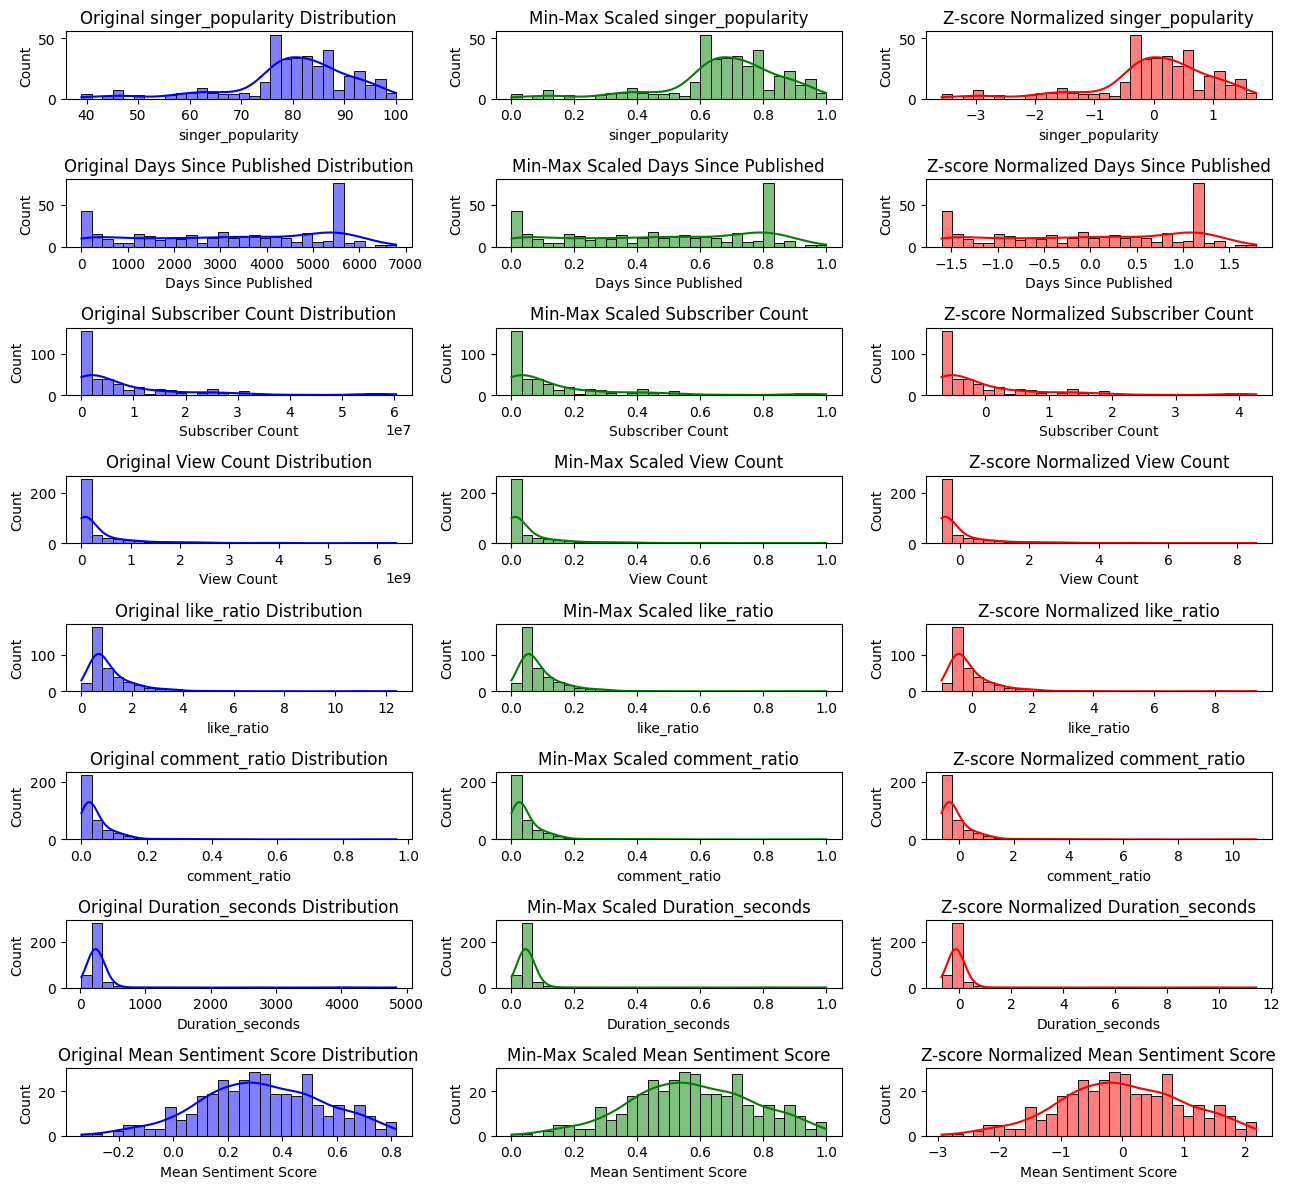

In [79]:
# 3. Visualize the impact of normalization for all numeric columns
plt.figure(figsize=(13,12))

# Plot the original, Min-Max scaled, and Z-score normalized distributions for each numeric column
for i, col in enumerate(numeric_cols, start=1):
    # Original distribution
    plt.subplot(len(numeric_cols), 3, i*3-2)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Original {col} Distribution')

    # Min-Max scaled distribution
    plt.subplot(len(numeric_cols), 3, i*3-1)
    sns.histplot(df_minmax[col], kde=True, color='green', bins=30)
    plt.title(f'Min-Max Scaled {col}')

    # Z-score normalized distribution
    plt.subplot(len(numeric_cols), 3, i*3)
    sns.histplot(df_standard[col], kde=True, color='red', bins=30)
    plt.title(f'Z-score Normalized {col}')

plt.tight_layout()
plt.show()


**Statistical Insights**:

- Conduct basic statistical tests (e.g., T-tests, ANOVA, chi-square) to explore relationships between variables.
- Summarize the statistical results and their implications for your analysis.

In [102]:
# ANOVA test for view counts across genres
from scipy.stats import f_oneway
genres = df['Genre'].unique()
genre_views = [df[df['Genre'] == genre]['View Count'] for genre in genres]
f_stat, p_value = f_oneway(*genre_views)
print("\n=== One-way ANOVA Test for View Count Across Genres ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value}")

like_ratio_bins = df['like_ratio'].unique()
like_ratio_views = [df[df['like_ratio'] == like_ratio]['View Count'] for like_ratio in like_ratio_bins]
f_stat_like_ratio, p_value_like_ratio = f_oneway(*like_ratio_views)
print("\n=== One-way ANOVA Test for View Count Across Like Ratio ===")
print(f"F-statistic: {f_stat_like_ratio}")
print(f"p-value: {p_value_like_ratio}")



=== One-way ANOVA Test for View Count Across Genres ===
F-statistic: 11.9445
p-value: 3.871891640564041e-09

=== One-way ANOVA Test for View Count Across Like Ratio ===
F-statistic: 12.005339777316456
p-value: 0.07990432736153048


For the one-way ANOVA: Genres vs View Count the results showed an F-value of 11.9445 while the p-value was 3.87e-09, which is much less than 0.05. This indicates that there is a statistically significant difference in video viewership across music genres.

For the one-way ANOVA: Like Ratio vs View Count , an F value of 12.0053 was obtained, but the p-value was 0.0799, which is greater than 0.05, which suggests that there may be a certain correlation between the LIKE Ratio and the amount of viewing, but from a statistical point of view, this difference is not statistically significant.

In [ ]:
# T-test for 'View Count' based on 'mean_sentiment_score'
from scipy.stats import ttest_ind
import numpy as np
median_sentiment = df['Mean Sentiment Score'].median()
high_sentiment = df[df['Mean Sentiment Score'] > median_sentiment]['View Count']
low_sentiment = df[df['Mean Sentiment Score'] <= median_sentiment]['View Count']

# T-test for 'View Count' based on 'mean_sentiment_score'
t_stat_sentiment, p_value_sentiment = ttest_ind(high_sentiment, low_sentiment)
print("\n=== T-test for View Count Based on Mean Sentiment Score ===")
print(f"T-statistic: {t_stat_sentiment}")
print(f"p-value: {p_value_sentiment}")


=== T-test for View Count Based on Mean Sentiment Score ===
T-statistic: -2.6437887108864815
p-value: 0.008544340977117903


As for T-test: View Count vs Mean Sentiment Score,p-value of 0.0085, which is less than 0.05, suggesting that differences in sentiment scores do indeed make a significant difference in viewings. The negative t-value further implies that there may be a negative correlation.

**Data Visualization and Storytelling**:


- **Visual Summary**:
 - Present key insights using charts and visualizations (e.g., Matplotlib, Seaborn, Plotly).
 - Ensure all visualizations are well-labeled and easy to interpret.


Correlation between Views and Likes: 0.931


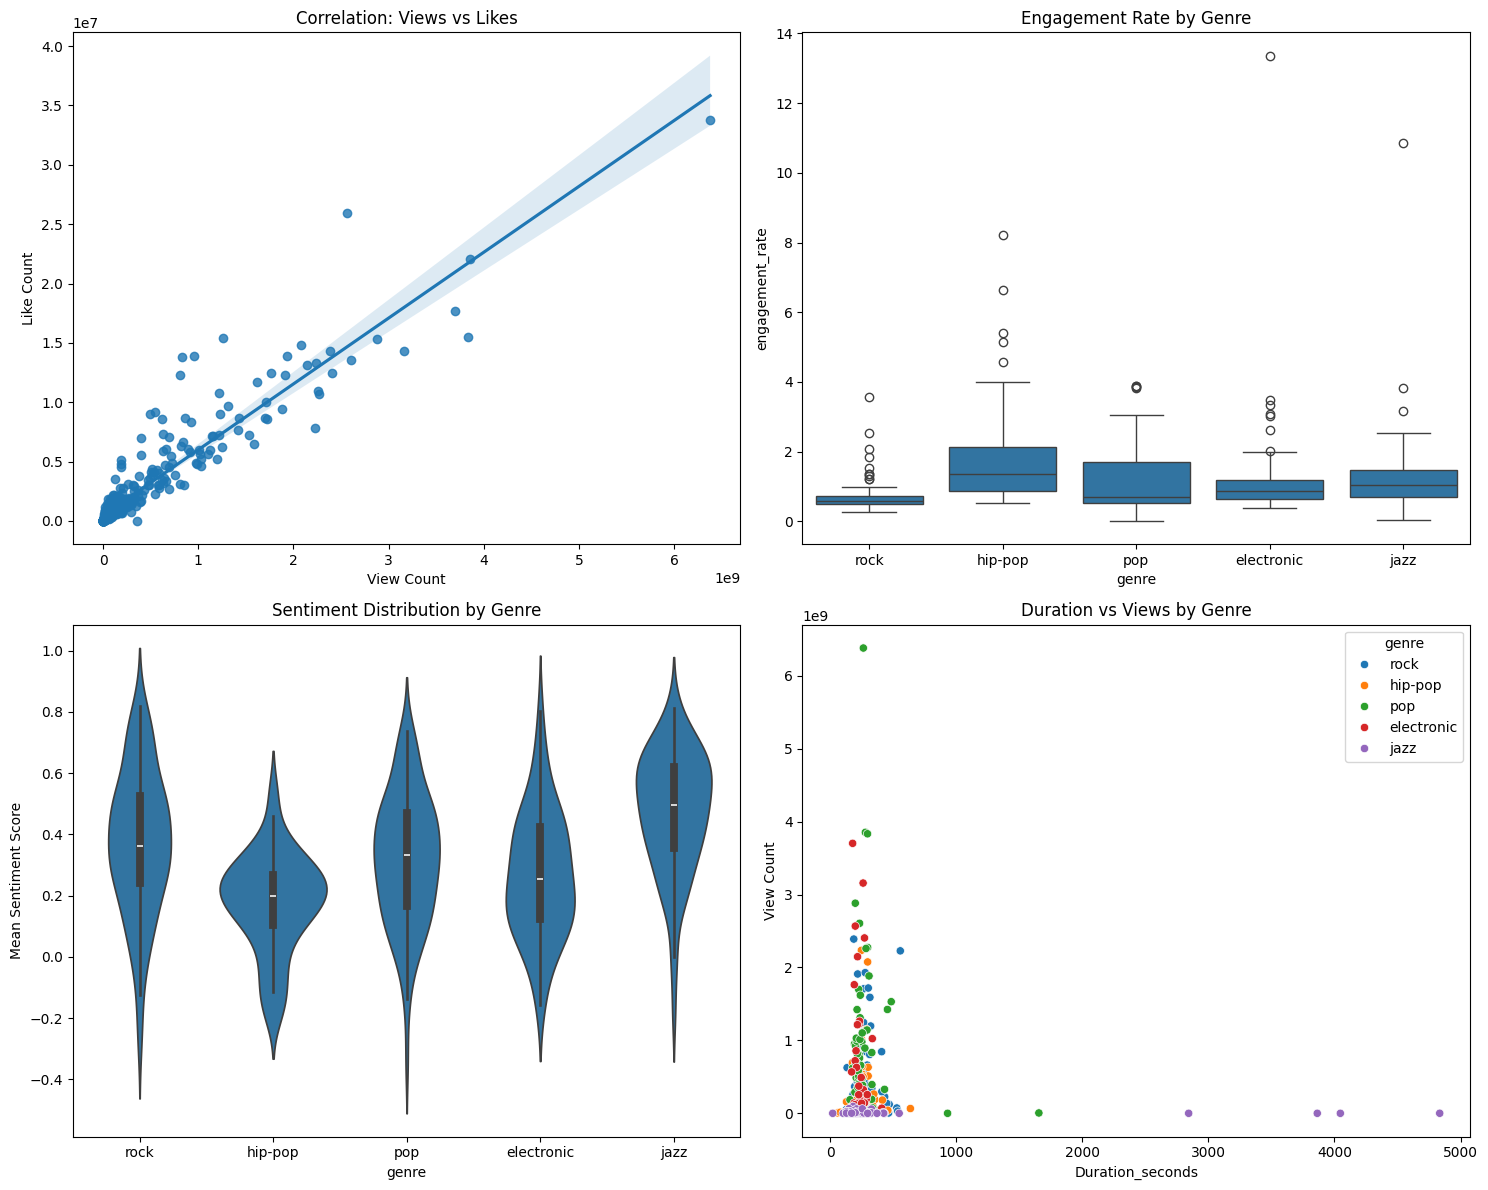

In [103]:
# 1. Statistical Tests and Visualizations for Engagement Metrics
def analyze_engagement_metrics():
    # Calculate engagement rate
    df['engagement_rate'] = (df['Like Count'] + df['Comment Count']) / df['View Count'] * 100
    
    # Create visualization for engagement metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Scatter plot: Views vs Likes with regression line
    sns.regplot(data=df, x='View Count', y='Like Count', ax=axes[0,0])
    axes[0,0].set_title('Correlation: Views vs Likes')
    
    # Calculate correlation
    correlation = df['View Count'].corr(df['Like Count'])
    print(f"\nCorrelation between Views and Likes: {correlation:.3f}")
    
    # Box plot: Engagement rate by genre
    sns.boxplot(data=df, x='genre', y='engagement_rate', ax=axes[0,1])
    axes[0,1].set_title('Engagement Rate by Genre')
    axes[0,1].tick_labels = rotation=45
    
    # Violin plot: Sentiment distribution by genre
    sns.violinplot(data=df, x='genre', y='Mean Sentiment Score', ax=axes[1,0])
    axes[1,0].set_title('Sentiment Distribution by Genre')
    axes[1,0].tick_labels = rotation=45
    
    # Scatter plot: Duration vs Views
    sns.scatterplot(data=df, x='Duration_seconds', y='View Count', hue='genre', ax=axes[1,1])
    axes[1,1].set_title('Duration vs Views by Genre')
    
    plt.tight_layout()
    
    return fig

fig = analyze_engagement_metrics()

In the terms of music genre, we can observe some interesting trends.Hip-hop has higher interaction rates but lower sentiment scores, indicates that despite frequent and positive viewer reactions and interactions to Hip-hop MVs, the comments or sentiment expressed in these videos may be more negatively charged. On the other hand, Jazz has lower view count but higher affective sentiment score, suggesting that despite fewer plays of this type of video, viewers generally rate its content more favorably, with more positive affective tendencies. This also reflects the fact that Jazz's viewer base, although smaller, has a higher appreciation of the content.

For Pop, the view count is very high and the affective scores are at a medium level, showing that Pop music has a wide acceptance and popularity among viewers, and although the emotional expression is not as extreme as that of Jazz, it is still able to attract a large number of viewers.Rock, on the other hand, exhibits a more stable interaction rate and medium affective scores, which means that the Rock category has a relatively balanced audience base with a stable level of interaction, but its affective responses and affective scores are more positive. level is stable, but its emotional response is not as intense as Hip-hop.

As for Electronic, has a higher number of views but a lower interaction rate, reflecting that although music videos of Electronic music can attract a large number of viewers, the sense of audience engagement and interactive behavior is lower, probably because the audience group of this type of music is less interested in interaction and watches it more as background music.

All in all, we can conclude that an increase in the view count usually leads to an increase in the like count. Meanwhile, short videos are more likely to inspire user interaction and sharing due to their short and concise nature, which coincides with the current hot trend of short video platforms.

Despite Jazz's better performance in sentiment scores and content ratings, its play count is generally low, which indicates that this music style has a more niche audience and is only enjoyed by specific groups. Pop and Electronic music videos, on the other hand, typically have higher plays, suggesting that if one wishes to create music content that is popular and can be distributed quickly, choosing the Pop or Electronic genres will undoubtedly be a more attractive option.

**Conclusions and Next Steps**:

- **Summary of EDA Findings**:
 - Highlight the main takeaways from the EDA process (key trends, patterns, data quality issues).
- **Implications for Modeling**:
 - Discuss how your EDA informs the next steps in your project (e.g., feature selection, data transformations).
 - Outline any further data cleaning or preparation required before moving into modeling.


In addition to the findings in the previous section, we can also observe some trends and conclusions.
First, both the like and comment rates show a heavily right-skewed distribution, implying that most music videos have a relatively small like count and comment count, while a few videos generate a large number of likes and comments, which is in line with the common pattern of interactions on social platforms: only a very small amount of content generates a wide range of attention and interactions.
Meanwhile, the interaction rate is negatively correlated with video duration, which reflects an interesting phenomenon. Longer duration videos tend to lead to a decrease in viewers' willingness to interact, probably because longer videos tend to fatigue viewers, while shorter videos are more likely to stimulate users' attention and interaction.

In the correlation analysis of viewership, we find that it is moderately positively correlated with the number of subscribers, suggesting that the more subscribers a channel has, the higher the view count of the video is usually, which is consistent with our intuitive experience that the more popular a channel is, the more viewers will watch new videos accordingly. On the other hand, view count shows a weak positive correlation with singer_popularity and although this correlation is not strong, it implies that an singer popularity may have some effect on the viewership of his or her videos. It is worth noting that shorter videos are more likely to receive a higher number of views, which is in line with the current characteristics of user behavior on social platforms, especially short video platforms-users prefer to watch short and concise content.

From the analysis of each music genre, we can also see that the sentiment scores of different genres differ significantly.
When we conduct regression analysis, we can use the above observed characteristics as the main variables for modeling. First, genre is a key categorization feature that can effectively help us classify different types of music videos, affecting behaviors such as the view count and engagement rate. Second, video duration is also an important factor, but it may have a non-linear relationship with other features, so the effect of video duration needs to be specifically addressed in the modeling. The number of subscribers, as a reflection of the channel's popularity, has a direct impact on the number of video views and should be used as one of the important input features. Singer popularity, on the other hand, can further help us analyze and predict video performance, especially when we want to delve into the role of singer influence on video interaction.